<a href="https://colab.research.google.com/github/Prateeklk/group_18_EAS501/blob/main/group18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!apt-get install python3.12.2



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.12-minimal libpython3.12-stdlib mailcap mime-support python3.12-minimal
Suggested packages:
  python3.12-venv binfmt-support
The following NEW packages will be installed:
  libpython3.12-minimal libpython3.12-stdlib mailcap mime-support python3.12 python3.12-minimal
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 6,133 kB of archives.
After this operation, 23.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.12-minimal amd64 3.12.3-1+jammy1 [876 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.12-

In [ ]:
import csv
import sqlite3


csv_file_path = "/content/drive/MyDrive/Python_dataset/healthcare-dataset-stroke-data.csv"


conn = sqlite3.connect('normalized_database.db')
cursor = conn.cursor()


cursor.execute('''CREATE TABLE IF NOT EXISTS Patients (
                    id INTEGER PRIMARY KEY,
                    gender TEXT,
                    age INTEGER,
                    hypertension INTEGER,
                    heart_disease INTEGER,
                    ever_married TEXT,
                    work_type TEXT,
                    Residence_type TEXT,
                    avg_glucose_level REAL,
                    bmi REAL,
                    smoking_status TEXT
                )''')

cursor.execute('''CREATE TABLE IF NOT EXISTS Disease (
                    id INTEGER,
                    stroke INTEGER,
                    FOREIGN KEY (id) REFERENCES Patients(id)
                )''')


with open(csv_file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:

        cursor.execute('''INSERT INTO Patients (id, gender, age, hypertension, heart_disease,
                                                ever_married, work_type, Residence_type,
                                                avg_glucose_level, bmi, smoking_status)
                          VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''',
                          (row['id'], row['gender'], row['age'], row['hypertension'],
                           row['heart_disease'], row['ever_married'], row['work_type'],
                           row['Residence_type'], row['avg_glucose_level'], row['bmi'],
                           row['smoking_status']))
        patient_id = cursor.lastrowid


        cursor.execute('''INSERT INTO Disease (id, stroke) VALUES (?, ?)''', (patient_id, row['stroke']))

conn.commit()
conn.close()

print("Normalized database created successfully.")


Normalized database created successfully.


In [ ]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('normalized_database.db')

sql_query = '''
SELECT Patients.id, Patients.age, Patients.gender, Patients.hypertension, Patients.heart_disease,
       Patients.ever_married, Patients.work_type, Patients.Residence_type,
       Patients.avg_glucose_level, Patients.bmi, Patients.smoking_status, Disease.stroke
FROM Patients
JOIN Disease ON Patients.id = Disease.id;
 '''

df = pd.read_sql_query(sql_query, conn)

conn.close()

print(df.head())


      id   age  gender  hypertension  heart_disease ever_married  \
0   9046  67.0    Male             0              1          Yes   
1  51676  61.0  Female             0              0          Yes   
2  31112  80.0    Male             0              1          Yes   
3  60182  49.0  Female             0              0          Yes   
4   1665  79.0  Female             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   N/A     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
df.head()

,id,age,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,67.0,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,61.0,Female,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
2,31112,80.0,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,49.0,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,79.0,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   gender             5110 non-null   object 
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 479.2+ KB


In [ ]:
!pip install ydata_profiling


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")


In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')

In [ ]:

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Numerical columns: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [ ]:
df.categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

<ipython-input-6-bdd881f5b970>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
df['bmi'].dtypes

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   gender             5110 non-null   object 
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# count missing values
missing_values = df.isnull().sum()


print("Missing values:")
print(missing_values)
print("\nData types:")
print(df.dtypes)

Missing values:
id                     0
age                    0
gender                 0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Data types:
id                     int64
age                  float64
gender                object
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [ ]:
df.shape

(5110, 12)

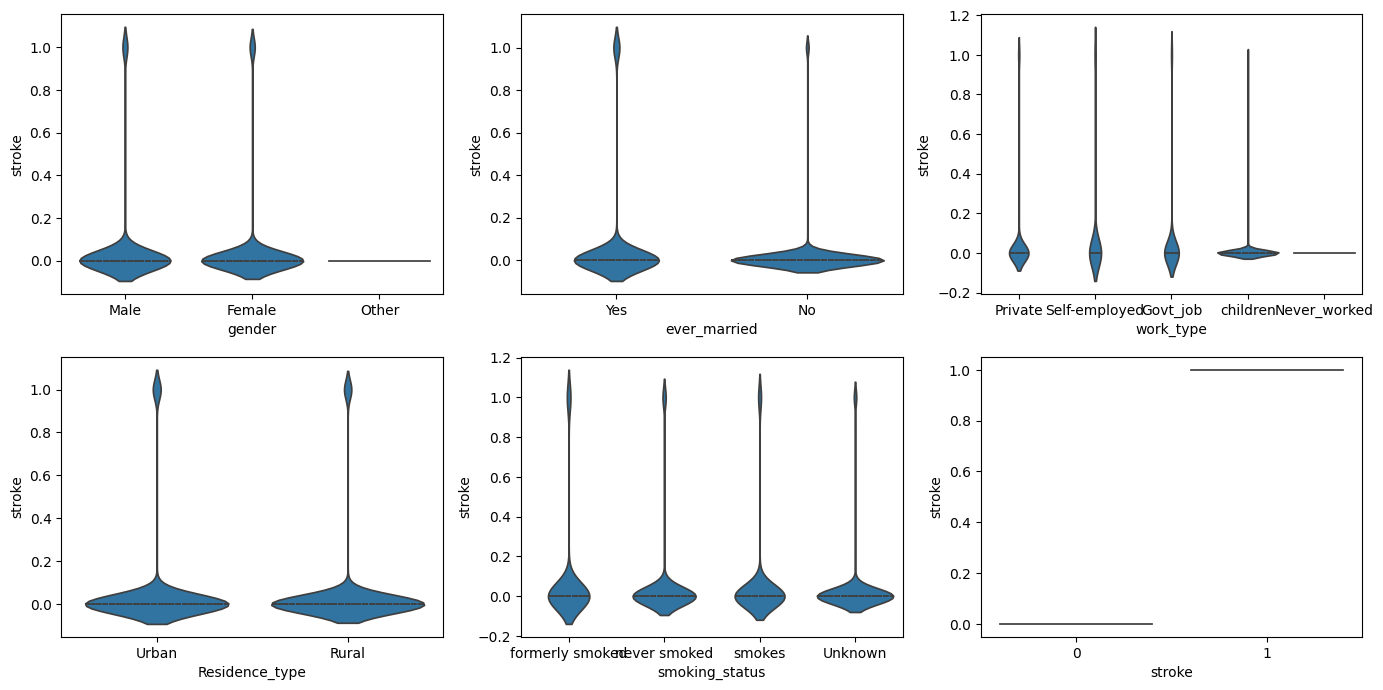

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 10))
categorical_cols.append('stroke')
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x=col, y='stroke', data=df, inner='quartile')
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler

class Preprocessor:
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.power_transformer = PowerTransformer()
        self.encoder = OneHotEncoder(drop='first', sparse=False)
        self.scaler = StandardScaler()

    def handle_missing_values(self, df):
        if self.strategy == 'mean':
            df.fillna(df.mean(), inplace=True)
        elif self.strategy == 'median':
            df.fillna(df.median(), inplace=True)
        elif self.strategy == 'most_frequent':
            df.fillna(df.mode().iloc[0], inplace=True)
        else:
            raise ValueError("Invalid strategy. Choose from 'mean', 'median', or 'most_frequent'.")
        return df

    def one_hot_encode(self, df, categorical_columns):
        encoded_data = self.encoder.fit_transform(df[categorical_columns])
        encoded_columns = self.encoder.get_feature_names_out(categorical_columns)
        encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
        return encoded_df

    def scale_data(self, df):
        scaled_data = self.scaler.fit_transform(df)
        return scaled_data


In [ ]:
preprocessor = Preprocessor()
df_cat = preprocessor.one_hot_encode(df, categorical_cols)

merged_df = pd.concat([df[numerical_cols], df_cat], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
merged_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,NaN,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
merged_df = preprocessor.handle_missing_values(merged_df)

In [ ]:
merged_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67.0,0,1,228.69,36.600000,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,51676,61.0,0,0,202.21,28.893237,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,31112,80.0,0,1,105.92,32.500000,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,60182,49.0,0,0,171.23,34.400000,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1665,79.0,1,0,174.12,24.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
merged_df.bmi.max()

97.6

In [ ]:
merged_df = merged_df.drop('stroke_1', axis=1)


In [ ]:
merged_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,28.893237,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.500000,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.400000,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
pip install lazypredict-nightly


  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == 

In [ ]:
from sklearn.model_selection import train_test_split
X = merged_df.drop(columns=['id', 'stroke'],axis=1)
y = merged_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Proportion of stroke cases in the dataset:")
print(merged_df['stroke'].value_counts(normalize=True))


from lazypredict import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

Proportion of stroke cases in the dataset:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


 97%|█████████▋| 28/29 [00:12<00:00,  1.60it/s]

[LightGBM] [Info] Number of positive: 199, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048679 -> initscore=-2.972603
[LightGBM] [Info] Start training from score -2.972603


100%|██████████| 29/29 [00:13<00:00,  2.19it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.75               0.74     0.74      0.82   
Perceptron                         0.89               0.63     0.63      0.91   
PassiveAggressiveClassifier        0.89               0.63     0.63      0.90   
QuadraticDiscriminantAnalysis      0.19               0.56     0.56      0.25   
GaussianNB                         0.19               0.56     0.56      0.25   
DecisionTreeClassifier             0.91               0.56     0.56      0.91   
LinearDiscriminantAnalysis         0.95               0.55     0.55      0.94   
BernoulliNB                        0.93               0.54     0.54      0.92   
ExtraTreeClassifier                0.91               0.54     0.54      0.91   
LGBMClassifier                     0.95               0.54     0.54      0.93   
XGBClassifier               

**1. LinearDiscriminantAnalysis:**
Accuracy: 0.95,
Balanced Accuracy: 0.55,
ROC AUC: 0.55,
F1 Score: 0.94,

**2. LogisticRegression:**
Accuracy: 0.95
Balanced Accuracy: 0.51
ROC AUC: 0.51
F1 Score: 0.93

**3. CalibratedClassifierCV:**
Accuracy: 0.95
Balanced Accuracy: 0.51
ROC AUC: 0.51
F1 Score: 0.93

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

# Assuming Preprocessor() is your custom preprocessor class
# Create pipelines for the three models

# Pipeline for LinearDiscriminantAnalysis
pipeline_lda = make_pipeline(Preprocessor(), LinearDiscriminantAnalysis())

# Pipeline for LogisticRegression
pipeline_logreg = make_pipeline(Preprocessor(), LogisticRegression())

# Pipeline for CalibratedClassifierCV
pipeline_calibrated = make_pipeline(Preprocessor(), CalibratedClassifierCV())


In [ ]:
pipeline_lda

Pipeline(steps=[('preprocessor',
                 <__main__.Preprocessor object at 0x795e5f9e82b0>),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [ ]:
pipeline_logreg

Pipeline(steps=[('preprocessor',
                 <__main__.Preprocessor object at 0x795e5f9ea590>),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline_calibrated

Pipeline(steps=[('preprocessor',
                 <__main__.Preprocessor object at 0x795e5ee8f5e0>),
                ('calibratedclassifiercv', CalibratedClassifierCV())])

In [ ]:

from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        return X

# Create the pipeline with the Preprocessor and LinearDiscriminantAnalysis
pipeline_lda = make_pipeline(Preprocessor(), LinearDiscriminantAnalysis())

# Now, you should be able to fit the pipeline without any errors
pipeline_lda.fit(X_train, y_train)


Pipeline(steps=[('preprocessor', Preprocessor()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [ ]:
params = pipeline_lda.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'lineardiscriminantanalysis': LinearDiscriminantAnalysis(),
 'lineardiscriminantanalysis__covariance_estimator': None,
 'lineardiscriminantanalysis__n_components': None,
 'lineardiscriminantanalysis__priors': None,
 'lineardiscriminantanalysis__shrinkage': None,
 'lineardiscriminantanalysis__solver': 'svd',
 'lineardiscriminantanalysis__store_covariance': False,
 'lineardiscriminantanalysis__tol': 0.0001}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate predictions on test data
y_test_hat = pipeline_lda.predict(X_test)

# Calculate RMSE and MAE on test data
mse_test = mean_squared_error(y_test, y_test_hat)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_hat)

print("Root Mean Squared Error (Test):", rmse_test)
print("Mean Absolute Error (Test):", mae_test)



Root Mean Squared Error (Test): 0.21896393648144905
Mean Absolute Error (Test): 0.04794520547945205


In [ ]:
from sklearn.linear_model import LogisticRegression

pipeline_logreg = make_pipeline(Preprocessor(), LogisticRegression())

pipeline_logreg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor', Preprocessor()),
                ('logisticregression', LogisticRegression())])

In [ ]:
params = pipeline_logreg.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'logisticregression': LogisticRegression(),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [ ]:
# calculating the predictions on test data by logistic regression
y_test_hat = pipeline_logreg.predict(X_test)


mse_test = mean_squared_error(y_test, y_test_hat)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_hat)

print("Root Mean Squared Error (Test):", rmse_test)
print("Mean Absolute Error (Test):", mae_test)


Root Mean Squared Error (Test): 0.2211869776019044
Mean Absolute Error (Test): 0.04892367906066536


In [ ]:
from sklearn.calibration import CalibratedClassifierCV

pipeline_calibrated = make_pipeline(Preprocessor(), CalibratedClassifierCV())


pipeline_calibrated.fit(X_train, y_train)


Pipeline(steps=[('preprocessor', Preprocessor()),
                ('calibratedclassifiercv', CalibratedClassifierCV())])

In [ ]:
params = pipeline_calibrated.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('calibratedclassifiercv', CalibratedClassifierCV())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'calibratedclassifiercv': CalibratedClassifierCV(),
 'calibratedclassifiercv__base_estimator': 'deprecated',
 'calibratedclassifiercv__cv': None,
 'calibratedclassifiercv__ensemble': True,
 'calibratedclassifiercv__estimator': None,
 'calibratedclassifiercv__method': 'sigmoid',
 'calibratedclassifiercv__n_jobs': None}

In [ ]:

y_test_hat = pipeline_calibrated.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_hat)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_hat)

print("Root Mean Squared Error (Test):", rmse_test)
print("Mean Absolute Error (Test):", mae_test)


Root Mean Squared Error (Test): 0.2211869776019044
Mean Absolute Error (Test): 0.04892367906066536


In [ ]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import make_pipeline


In [ ]:

X_test = X_test.drop(['gender_Male', 'gender_Other'], axis=1)
X_train = X_train.drop(['gender_Male', 'gender_Other'], axis=1)

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV


Preprocessor_pipeline = make_pipeline(Preprocessor())


pipelines = {
    'cc': make_pipeline(Preprocessor_pipeline, CalibratedClassifierCV()),
    'ld': make_pipeline(Preprocessor_pipeline, LinearDiscriminantAnalysis()),
    'lr': make_pipeline(Preprocessor_pipeline, LogisticRegression())
}

grid = {
    'cc': {
        'calibratedclassifiercv__base_estimator': [LogisticRegression()],  # Specify the base estimator
        'calibratedclassifiercv__base_estimator__C': [3.0, 0.1, 0.5],
        'calibratedclassifiercv__base_estimator__penalty': ['l1','l2','elasticnet'],
    },
    'ld': {
        'lineardiscriminantanalysis__solver': ['svd'], #'lsqr','svd'
        'lineardiscriminantanalysis__shrinkage': [None, 'auto'],
    },
    'lr': {
        'logisticregression__C': [0.1, 10.0, 0.9],
        'logisticregression__penalty': [ 'l2','l1'],#l1
    }
}

total_start = time.monotonic()
fit_models = {}
for algo, pipeline in pipelines.items():
    try:
        print(algo)
        start = time.monotonic()
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10, scoring='r2')
        model.fit(X_train, y_train)
        fit_models[algo] = model
        end = time.monotonic()
        print(algo, end-start)
    except Exception as e:
        print(f'Model {algo} had an error {e}')

end = time.monotonic()
print(end-total_start)

print(fit_models['cc'].best_estimator_.named_steps['calibratedclassifiercv'].base_estimator, fit_models['cc'].best_score_)
print(fit_models['ld'].best_estimator_.named_steps['lineardiscriminantanalysis'], fit_models['ld'].best_score_)
print(fit_models['lr'].best_estimator_.named_steps['logisticregression'], fit_models['lr'].best_score_)


cc
cc 17.11170970499984
ld
ld 0.2904060289999961
lr
lr 2.560305298000003
19.97049554499995
LogisticRegression(C=0.1) -0.051170063339782204
LinearDiscriminantAnalysis() -0.1986324897792942
LogisticRegression(C=0.1) -0.051170063339782204


In [ ]:
import os
import mlflow
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from mlflow.models import infer_signature


# Set MLflow tracking URI and credentials
os.environ['MLFLOW_TRACKING_URI'] = "https://dagshub.com/prateeklk24/heart_disease_classification.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = "prateeklk24"
os.environ['MLFLOW_TRACKING_PASSWORD'] = "32bc910b2d656acbb41183a09cf4cb45a5512b7a"

# Set MLflow tracking URI
mlflow.set_tracking_uri(uri=os.environ['MLFLOW_TRACKING_URI'])

# Create a new MLflow Experiment
mlflow.set_experiment("heart_disease_classification")

# Start an MLflow run for each model
for algo, model in fit_models.items():
    score = model.best_score_
    params = model.best_params_
    with mlflow.start_run():
        # Log the hyperparameters
        mlflow.log_params(params)

        # Log metrics
        mlflow.log_metric("r2", score)

        # Infer the model signature
        signature = infer_signature(X_train, model.best_estimator_.predict(X_train))

        # Log additional evaluation metrics
        y_pred = model.best_estimator_.predict(X_test)
        mlflow.log_metric("accuracy_score", accuracy_score(y_test, y_pred))
        mlflow.log_metric("balanced_accuracy_score", balanced_accuracy_score(y_test, y_pred))
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
        mlflow.log_metric("precision_score", precision_score(y_test, y_pred))
        mlflow.log_metric("recall_score", recall_score(y_test, y_pred))
        mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))

        # Log the model
        mlflow.sklearn.log_model(
            sk_model=model.best_estimator_,
            artifact_path="heart_disease_model",
            signature=signature,
            input_example=X_train,
            registered_model_name=algo
        )


Registered model 'cc' already exists. Creating a new version of this model...
2024/05/08 04:25:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: cc, version 21
Created version '21' of model 'cc'.
Registered model 'ld' already exists. Creating a new version of this model...
2024/05/08 04:25:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ld, version 21
Created version '21' of model 'ld'.
Registered model 'lr' already exists. Creating a new version of this model...
2024/05/08 04:25:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: lr, version 20
Created version '20' of model 'lr'.


In [ ]:
# MAIN CODE ENDS HERE

In [ ]:
import pickle

# Save the fitted models using pickle
for algo, model in fit_models.items():
    with open(f'{algo}_model.pkl', 'wb') as file:
        pickle.dump(model, file)


In [ ]:
# Install virtualenv
!pip install virtualenv

# Create a virtual environment with the desired Python version
!virtualenv -p python3.12.2 myenv  # Replace python3.8 with your desired Python version

# Activate the virtual environment
!source myenv/bin/activate

RuntimeError: failed to find interpreter for Builtin discover of python_spec='python3.12.2'
/bin/bash: line 1: myenv/bin/activate: No such file or directory
